In [1]:
!pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Using cached soupsieve-2.5-py3-none-any.whl (36 kB)
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135766 sha256=8959e3cbbe47a08981681f3db52780ba87ced903f9d3dda9b33da9b9e8384d0c
  Stored in directory: c:\users\hangil\appdata\local\pip\cache\wheels\77\6b\dc\722aee2a5d46a021ab67564c9d3d5536c3bd9577fcdc3a5aeb
Successfully built peewee


You should consider upgrading via the 'c:\users\hangil\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# 왜 정상성이 필요한가?

1. 예측의 일관성: 정상 시계열은 시간에 따라 그 통계적 속성이 일정하게 유지됩니다. 이는 미래 데이터를 예측할 때 일관된 기준을 사용할 수 있음을 의미합니다.

2. 모델링의 단순화: 정상 시계열은 비정상 시계열에 비해 분석하고 모델링하기가 더 쉽습니다. 변화하는 평균이나 분산을 걱정할 필요가 없으므로, 예측 모델을 구축하고 해석하기가 더 간단합니다.

3. 시계열 분석 방법 적용 가능: 많은 시계열 분석 기법들은 데이터가 정상성을 가정하에 개발되었습니다. 예를 들어, ARIMA(자기회귀누적이동평균) 모델 같은 경우는 정상 시계열 데이터에 대해 효과적으로 작동합니다.

4. 추세와 계절성 식별: 비정상 시계열에서는 추세나 계절성과 같은 패턴을 식별하기 어려울 수 있습니다. 정상 시계열에서 이러한 패턴은 보다 명확하게 드러나고 분석하기 쉽습니다.

5. 통계적 추론의 유효성: 시계열 데이터가 정상성을 만족할 때, 통계적 추론과 가설 검정이 더 타당해집니다. 데이터의 통계적 속성이 일정하므로, 결과에 대한 신뢰도가 높아집니다.



# 

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

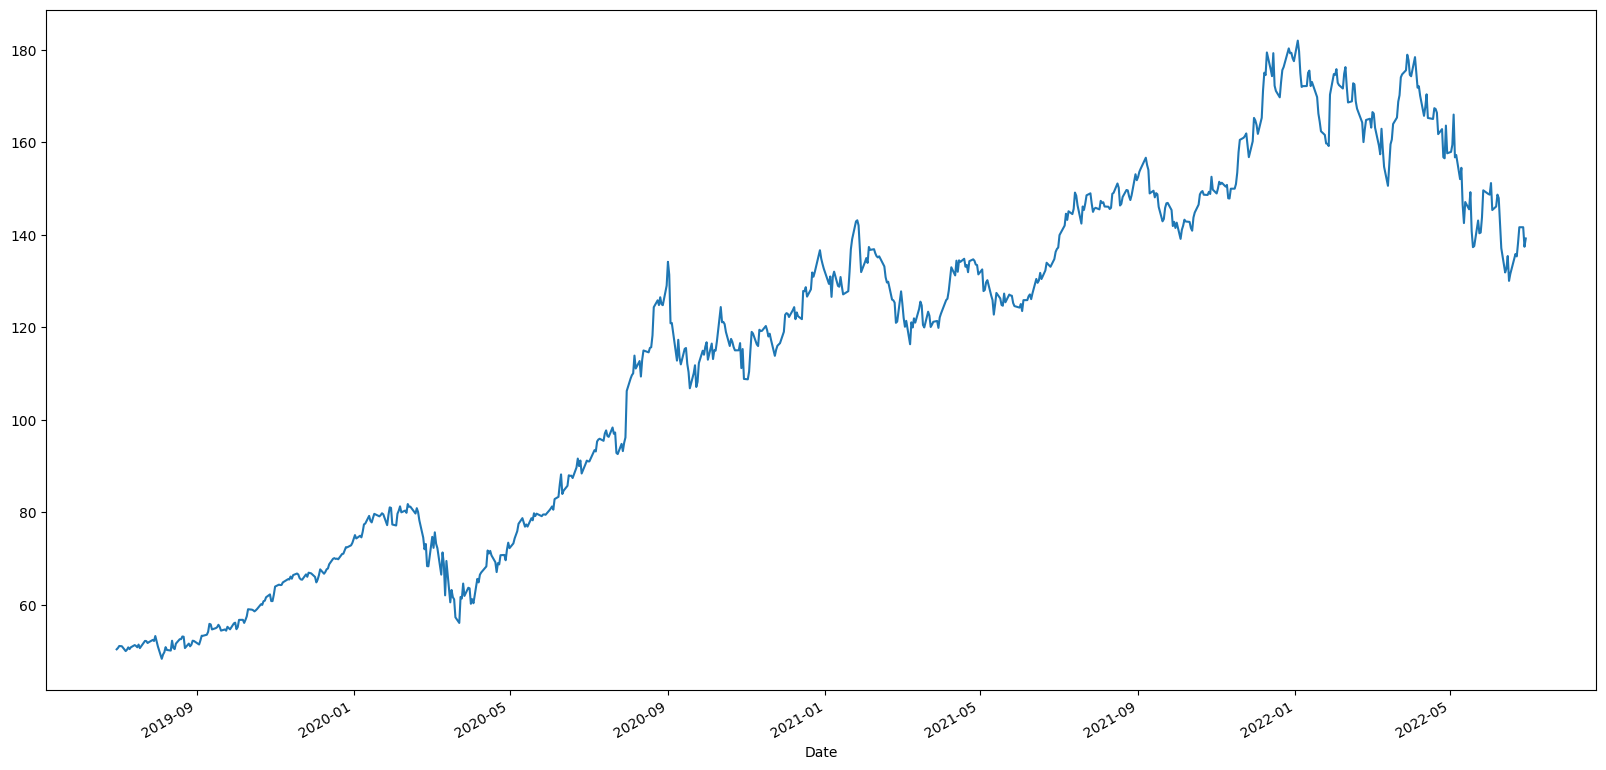

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
aapl = yf.download("AAPL", start="2019-07-01", end="2022-06-30")

# 애플의 종가를 시각화
aapl['Close'].plot(figsize=(20, 10))

In [4]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-01,50.792500,51.122501,50.162498,50.387501,48.756931,109012000
2019-07-02,50.352501,50.782501,50.340000,50.682499,49.042385,67740800
2019-07-03,50.820000,51.110001,50.672501,51.102501,49.448795,45448000
2019-07-05,50.837502,51.270000,50.724998,51.057499,49.405243,69062000
2019-07-08,50.202499,50.349998,49.602501,50.005001,48.386803,101354400
...,...,...,...,...,...,...
2022-06-23,136.820007,138.589996,135.630005,138.270004,137.083298,72433800
2022-06-24,139.899994,141.910004,139.770004,141.660004,140.444214,89116800
2022-06-27,142.699997,143.490005,140.970001,141.660004,140.444214,70207900


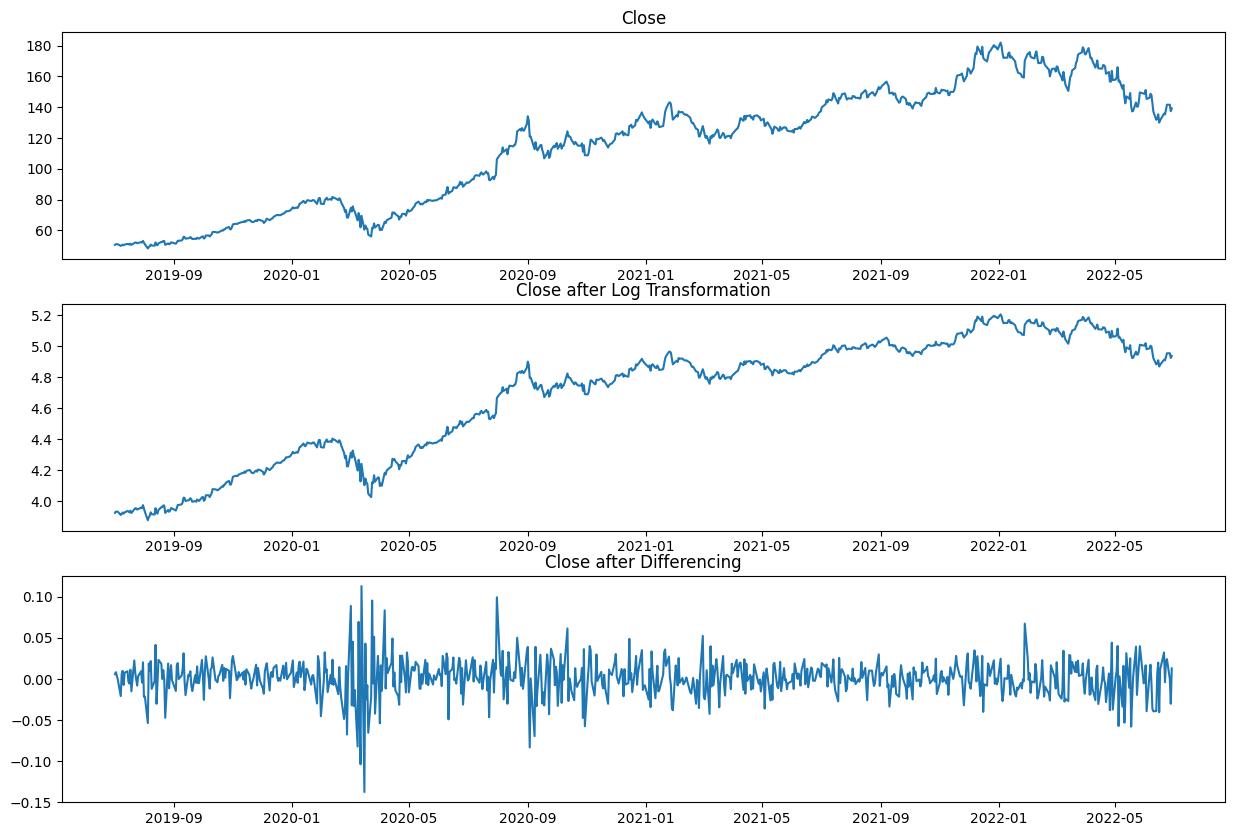

In [5]:
# 애플의 종가 로그화
aapl['Close-log'] = np.log(aapl['Close'])

# 로그 후 차분 (1)
aapl['Close-station'] = aapl['Close-log'].diff(1)

# 결측치 제거
aapl = aapl.dropna()

# 시각화
fig,ax = plt.subplots(3, figsize=(15,10))

# 종가
ax[0].plot(aapl['Close'])
ax[0].set_title('Close')

# 로그 종가
ax[1].plot(aapl['Close-log'])
ax[1].set_title('Close after Log Transformation')

# 로그 차분 종가
ax[2].plot(aapl['Close-station'])
ax[2].set_title('Close after Differencing')
plt.show()

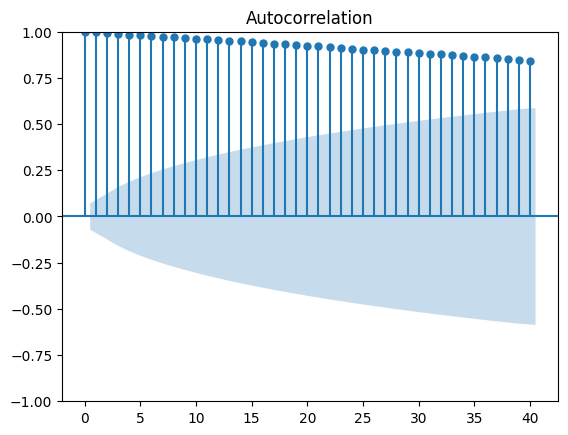

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(aapl['Close'], lags=40, alpha=0.05)
plt.show()

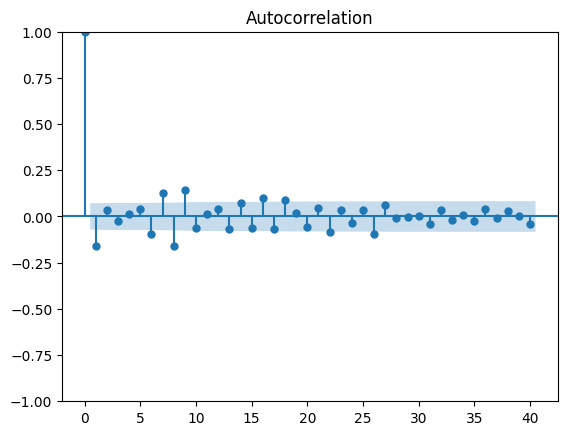

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(aapl['Close-station'], lags=40, alpha=0.05)
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(aapl['Close-station'])
print(results)

(-8.869302545952348, 1.4121695269455672e-14, 8, 746, {'1%': -3.439146171679794, '5%': -2.865422101274577, '10%': -2.568837245865348}, -3526.0235687731893)
